# Importing and Tidying the Data

In [2]:
# import stuff
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [4]:
#import the data from csv file with a series of NAN values 
df3 = pd.read_csv('./../data/highered_00004.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )

In [5]:
#'REFID' contains two data types and is repeated info from 'PERSONID'. Column dropped. 
df = df3.drop(['REFID'], axis=1)

In [6]:
# explanation of the survey https://highered.ipums.org/highered/survey_designs.shtml

# Respondents from each of these three surveys with science or engineering degrees                               ##
# or occupations are compiled into one dataset: the SESTAT (the Scientists and Engineers Statistical Data System)##

df.info(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478747 entries, 0 to 478746
Data columns (total 33 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
GENDER      478747 non-null int64
MINRTY      478747 non-null int64
RACETH      478747 non-null int64
BTHUS       478747 non-null int64
CTZUSIN     478747 non-null int64
CTZUS       438777 non-null float64
FNVS        20573 non-null float64
CHTOT       219740 non-null float64
BA03Y5      465491 non-null float64
NBAMED      463945 non-null float64
NBAMEMG     465494 non-null float64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-n

**Use string catagorical data to replace numerical data for easy understanding**

In [7]:
#change the minority column to string containing the actual value
min_map = {0: 'Not minority', 1: 'Minority'}
df['MNTRS'] = df['MINRTY'].map(min_map)

In [8]:
#change the gender column to string containing the actual 'female' or 'male' value
gen_map = {1: 'Female', 2: 'Male'}
df['GENDERS'] = df['GENDER'].map(gen_map)

In [9]:
major_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['MajorS'] = df['NDGMEMG'].map(major_map)

In [10]:
job_map = {1: 'Computer/Maths Sciences', 2: 'Bio., Agr. and Env. sciences', 3: 'Physical Sciences', 4: 'Social Sciences', 5: 'Engineering', 6: 'Science and engineering-related fields', 7: 'Non-science and engineering fields' }
df['JobS'] = df['NOCPRMG'].map(job_map)

In [11]:
#change the race column to string containing the actual value
race_map = {1: 'Asian', 2: 'White', 3: 'Other Minorities', 4: 'Other'}
df['RACES'] = df['RACETH'].map(race_map)

In [12]:
#how many people are employed for each gender?
LF_map = {1: 'Employed', 2: 'Unemployed', 3: 'Unemployed'}
df['LFSTATS'] = df['LFSTAT'].map(LF_map)

In [13]:
#change the birth in US column to string containing the actual value
birth_map = {0: 'Not in the US', 1: 'Born in the US'}
df['BUSS'] = df['BTHUS'].map(birth_map)

In [14]:
#how many people are satisfied with their jobs
JS_map = {1: 'Satisfied', 2: 'Satisfied', 3: 'Dissatisfied', 4: 'Dissatisfied'}
df['JobSatis'] = df['JOBSATIS'].map(JS_map)
df_gender_satisfy = df.groupby('GENDERS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()

In [15]:
#how many people are satisfied with their jobs
JR_map = {1: 'Related', 2: 'Related', 3: 'Not Related'}
df['JobR'] = df['OCEDRLP'].map(JR_map)

**Drop unusable columns**

In [16]:
df = df.drop(['MINRTY','GENDER','RACETH','BTHUS','FNVS', 'CHTOT', 'CTZUS','NBAMEMG','NBAMED', 'BA03Y5'],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478747 entries, 0 to 478746
Data columns (total 32 columns):
PERSONID    478747 non-null int64
YEAR        478747 non-null int64
WEIGHT      478737 non-null float64
SAMPLE      478747 non-null int64
SURID       478747 non-null int64
AGE         478747 non-null int64
BIRYR       478747 non-null int64
CTZUSIN     478747 non-null int64
DGRDG       478747 non-null int64
HD03Y5      478747 non-null int64
NDGMED      478747 non-null int64
NDGMEMG     478747 non-null int64
LFSTAT      478747 non-null int64
WRKG        478747 non-null int64
HRSWKGR     407478 non-null float64
WKSWKGR     407478 non-null float64
LOOKWK      71269 non-null float64
OCEDRLP     407478 non-null float64
NOCPR       407478 non-null float64
NOCPRMG     407478 non-null float64
SALARY      407478 non-null float64
CPI2009C    478747 non-null float64
JOBSATIS    407478 non-null float64
MNTRS       478747 non-null object
GENDERS     478747 non-null object
MajorS      478747

** Make some branch data frames for easy manipulation **

In [18]:
#a data frame for graduates only 
df_SDR = df[(df['SAMPLE']==602) |(df['SAMPLE']==602) | (df['SAMPLE']==1002)]
df_graduate = df[(df['DGRDG'] == 2) | (df['DGRDG'] == 3) | (df['DGRDG'] == 4)]
df_dr = df[(df['DGRDG'] == 3) ]
df_prof = df[(df['DGRDG'] == 4) ]

In [27]:
#a data frame only contains those employed in STEM fields
df_stem = df[df['NOCPRMG']!=7]
df_stem['NOCPRMG'].value_counts()

6.0    81345
5.0    61641
1.0    53089
2.0    35089
4.0    33450
3.0    24585
Name: NOCPRMG, dtype: int64

In [28]:
#a data frame for undergraduates only 
df_CR = df[(df['SAMPLE']==601) | (df['SAMPLE']==603) | (df['SAMPLE']==1001)]
df_undergraduate = df[(df['DGRDG'] == 1)]

In [29]:
df_2003 = df[df['YEAR']==2003]

In [30]:
df_2013 = df[df['YEAR']==2013]

# Exploratory Data Analysis #

## General question: How is the age and salary distribution for the data?##
The KDE pair plot with Age and SALARY shows the distributions and relationships between the two columns. 
It is presented below that:
1. The age distributes evenly between 30 and 60. There is s slight peak right before 30 and a tail after 60.
2. The distribution of salary appears to be bimodal: one peak at around 60,000 and one sharp peak at 150,000. The reason for the 150,000 peak is from the capped value of this column. 
3. Younger people makes less money generally. 
4. The salary goes up when they are at an older age, until around 50 years old. 


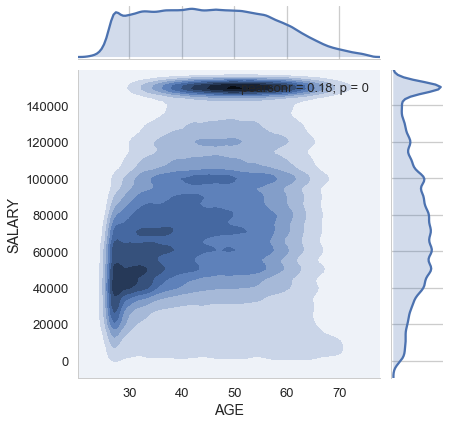

In [21]:

sns.jointplot(x='AGE',y='SALARY',data=df, kind='kde')

## How much do women comprise the US STEM jobs?##

It is reported by U.S. Department of Commerce that women comprise 48 percent of the U.S. workforce but just 24 percent of STEM workers. We can do a quick check of the STEM jobs to see how does the female percentage look like over the years. 

Note that we use df_stem here to choose only the data frame contains STEM workers. We are also only looking at the data when the individual is employed. 

The bar plot shows about 33% of the STEM workers are women, from this set of data. The number differs from the 24% reported by the U.S. workforce. Several reasons could be contributing to it. First of all, there might be a gender bias in the volunteer based survey. There might simply be more men willign to take the survey than women. Also, the report by U.S. workforce might be based on a data from a different year. 

Nevertheless, a increasing trend in the female percentage over the year (2003-2013) is present in this data set. There are more women working in the STEM job fields and it is encouraging!


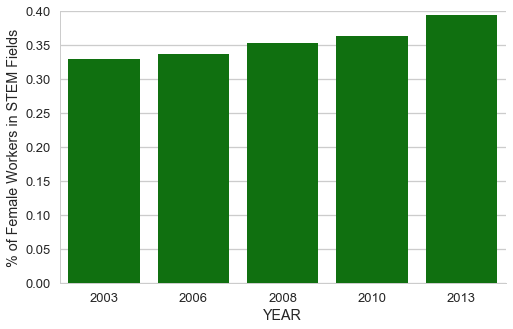

In [52]:
plt.figure(figsize=(8,5))
df_female_percentage = df_stem[df_stem['LFSTATS']=='Employed'].groupby('YEAR')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='YEAR', y='Female', data = df_female_percentage, color="green")
plt.xlabel('YEAR')
plt.ylim([0,0.4])
plt.ylabel('% of Female Workers in STEM Fields')
sns.despine()

## What is the employment rate for genders from the STEM community?##
The bar plot below shows the employment rate in the STEM community for the female and male groups. It indicates the employment rate for all is between 80%-90% with around 3% higher rate for men than women. 

In [23]:
df_gender_employ = df.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

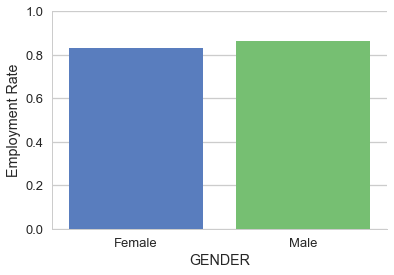

In [24]:
#count plot of employed and unemployed entries for genders.
sns.barplot(x='GENDERS', y='Employed', data = df_gender_employ, palette="muted")
plt.xlabel('GENDER')
plt.ylim([0,1])
plt.ylabel('Employment Rate')
sns.despine()

In [25]:
df_gender_jobrelated = df.groupby('GENDERS')['JobR'].value_counts(normalize=True).unstack().reset_index()
df_gender_jobrelated 

JobR,GENDERS,Not Related,Related
0,Female,0.134216,0.865784
1,Male,0.117337,0.882663


### A closer look at the employment rate ###

We have already known that the female employment is lower than that of male. Now we take a closer look into the data, in specific, the undergraduate and graduate group data.

The below dot plot shows the employment rate for both female and male in the undergraduate and graduate groups. It is clear that the undergraduate group has a 7% employment rate difference in men and women. And the disparity diminishes for the graduate group. In fact, female employment rate goes almost the same as males in graduate level groups!

The last dot plot shows the employment rate for the doctorate group. In this case, the employment rate for women rose higher than the men! Can we consider this to be an effective career advice for female students?

In [26]:
employ_ug = df_undergraduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_ug_melt = pd.melt(employ_ug.reset_index(), id_vars ='GENDERS')
employed_ug_melt_e = employ_ug_melt[employ_ug_melt['LFSTATS']=='Employed']
employed_ug_melt_e['Degree'] = 'Undergraduate'
employ_gr = df_graduate.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_gr_melt = pd.melt(employ_gr.reset_index(), id_vars ='GENDERS')
employed_gr_melt_e = employ_gr_melt[employ_gr_melt['LFSTATS']=='Employed']
employed_gr_melt_e['Degree'] = 'Graduate'
employ_dr = df_dr.groupby('GENDERS')['LFSTATS'].value_counts(normalize=True).unstack()
employ_dr_melt = pd.melt(employ_dr.reset_index(), id_vars ='GENDERS')
employed_dr_melt_e = employ_dr_melt[employ_dr_melt['LFSTATS']=='Employed']
employed_dr_melt_e['Degree'] = 'Doctorate'
employed_new = pd.concat([employed_ug_melt_e,employed_gr_melt_e,employed_dr_melt_e])

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

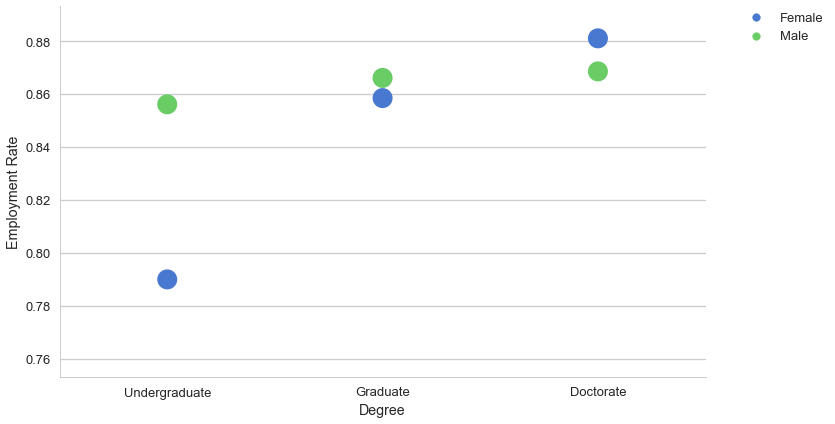

In [27]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Degree', y='value', data=employed_new, hue='GENDERS', size =20, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.ylabel('Employment Rate')

## What is the compensation distribution for each gender from the STEM community?##

The violin plot below shows the salary in the STEM community for the female and male groups between year 2003 and 2013. Note that the salary is capped at $150,000 thus the could shaped cluster at the top of each violin. 


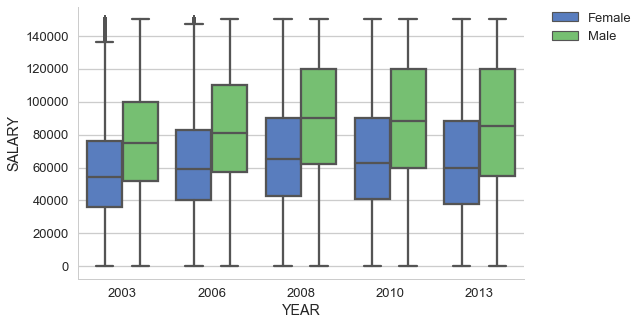

In [28]:
#bar plot of gender and salary 
plt.figure(figsize=[8,5])
sns.boxplot(data=df, y = 'SALARY', x = 'YEAR', hue = 'GENDERS', palette="muted")
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Several things we see: ####
1. The median, and the quatiles wages for men is about 30\% higher than women, for all years.
2. There is NO shrinking trend in the gender discrepancies in recent years. 
3. The mean wages increased from year 2003 to 2008. Then we see a small decrease from 2008 to 2013. This makes sense considering the financial crisis in 2008. It is intersting to see the magnitude and how long it has been affecting the job market. 

In the analysis below we take a closer look at the salaries over the years, with different highest degree groups for STEMers. 

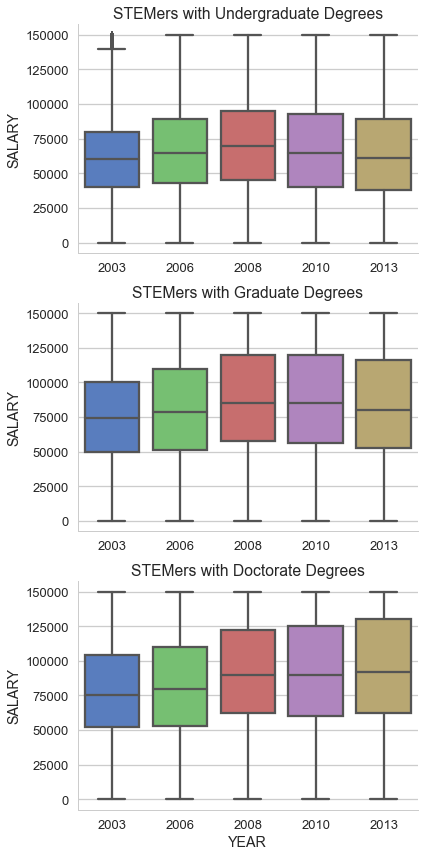

In [29]:
fig, axs = plt.subplots(nrows=3, figsize=(6,12))

#Plot undergraduate level salaries
sns.boxplot(data=df_undergraduate, y = 'SALARY', x = 'YEAR', palette="muted", ax=axs[0])
axs[0].set_title('STEMers with Undergraduate Degrees')
axs[0].set_xlabel('')

#Plot graduate level salaries 
sns.boxplot(data=df_graduate, y = 'SALARY', x = 'YEAR', palette="muted", hue_order=["Female", "Male"], ax=axs[1])
axs[1].set_title('STEMers with Graduate Degrees')
axs[1].set_xlabel('')


#Plot doctorate level salaries
sns.boxplot(data=df_dr, y = 'SALARY', x = 'YEAR', palette="muted", ax=axs[2])
axs[2].set_title('STEMers with Doctorate Degrees')
axs[2].set_xlabel('YEAR')
sns.despine()

plt.tight_layout()

#### A close look: salary trend between 2003-2013 with degree group ####

First of all, let us just conclude all the above plots give a steady increase in salary from year 2003 to 2008. But things get intereting after 2008. 

In the first subplot above, we see the salaries for individuals with undergraduate highest degree. It clearly indicates the trending down after year 2008. So how about STEMers with graduate degrees?

The second subplot shows the salary boxplot with graduate degrees (master, doctorate, and professional degrees). It also presents the downward trend between these years. Perhaps, a even closer looks is required. What about STEMers with doctorate degrees? 

The last subplot contains data from only the doctorate group. Now we see a **difference**! This bar plot did not show a down trend. In stead, the mean salary for year 2010 kept about the same as 2008 and an even an increased in 2013. 

In a financial crisis like this, the doctorate group in average was influenced least and recovered fastest. It gives some insights to the need for highly specialized professionals from our society.


## If an observation is from a minority group or not makes a difference in salary?##

The answer is YES. According to the survey data, a self-reported caucasion individual makes 19% more money in average than a minority individual. That is a significant difference. 

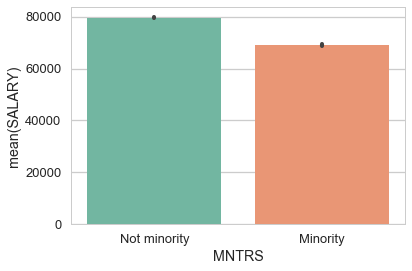

In [30]:
#Compare and visualize the minority factor
sns.barplot(data=df, y = 'SALARY', x = 'MNTRS', palette="Set2" )

## More detailed plot for the above plots?## 
The box plot blow shows the salary distribution for both genders groups and three race categories. It gives visualization for both year 2003 (left) and 2013 (right). 
We already know: a. Men make more than women. b. Non-minorities make more than minorities.
What is new: 
1. The pay gap between men and women exist in all race groups. 
2. The average salary for caucasion and asian men are about the same. The same story does not apply to women group: the average salary for asian women is higher than the rest of female race groups. 
3. None of the pay gaps shrunk between year 2013 and 2003 for each race groups. As a matter of fact, they all got worse in 2013, if not the same. 

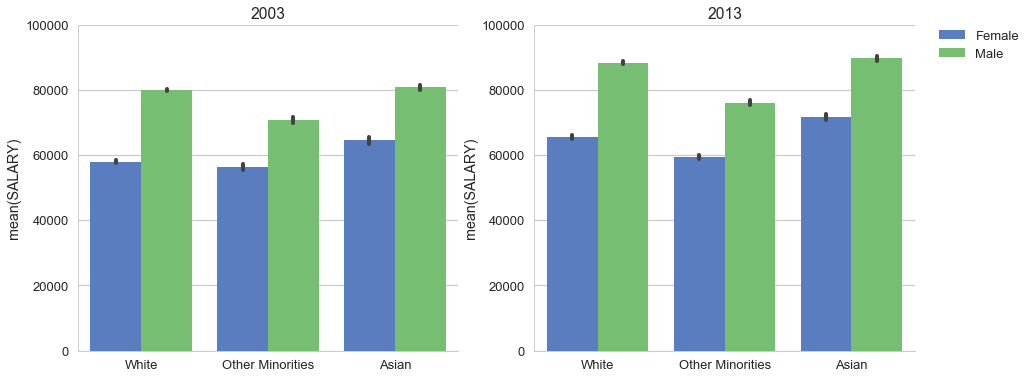

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))

#Compare and plot the SALARY of races and genders from year 2003 
sns.barplot(data=df[df['YEAR']==2003], y = 'SALARY', x = 'RACES', hue = 'GENDERS', palette="muted", ax=axs[0])
axs[0].legend().remove()
axs[0].set_title('2003')
axs[0].set_xlabel('')
axs[0].set_ylim([0,100000])


#Compare and plot the SALARY of races and genders from year 2013 
sns.barplot(data=df[df['YEAR']==2013], y = 'SALARY', x = 'RACES', hue = 'GENDERS', palette="muted", ax=axs[1])
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].set_title('2013')
axs[1].set_xlabel('')
axs[1].set_ylim([0,100000])
sns.despine()


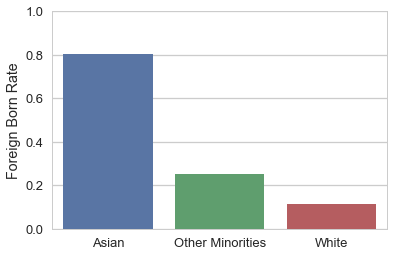

In [32]:
#countplot of entries of whether was born in US for each races.
df_bius = df.groupby('RACES')['BUSS'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='RACES', y='Not in the US', data=df_bius )
plt.xlabel('')
plt.ylim([0,1])
plt.ylabel('Foreign Born Rate')

In [33]:
employ_female_2003 = df_2003[df_2003['GENDERS']=='Female'].groupby('MajorS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

In [34]:
employ_female_2013 = df_2013[df_2013['GENDERS']=='Female'].groupby('MajorS')['LFSTATS'].value_counts(normalize=True).unstack().reset_index()

## What is employment rate of the female STEMers in different field of majors?##

The dot plot shows the female employment rate for field of major groups in 2003 and 2013. 
Things worth noticing:
1. The employment rate for non-science and engineering fields major remained above average for both years. A closer look reveals this group contains job title such as 'Management' and 'Administration'. 
2. There is a significant increase in the employment rate for the female engineering group (from 85% to 88%). 
3. The employment rate of another group who saw an increase from 2003 to 2013 is computer/maths sciences. All the other group either remained a similar or received a lower rate.

Found trend from this plot!

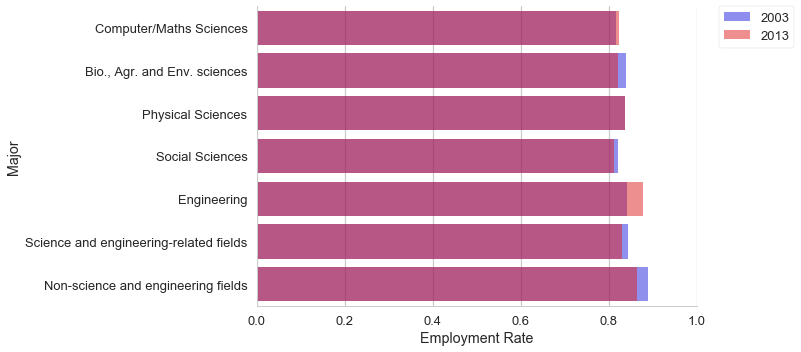

In [35]:
fig, axs = plt.subplots(figsize=(10,5))
field_order = ['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields']
#Compare and plot the employment percentage for male and female college graduates
sns.set_color_codes("pastel")
sns.barplot( x="Employed",y="MajorS", order = field_order, alpha=0.5, data=employ_female_2003, color='blue', label='2003')


#Compare and plot the employment percentage for male and female doctor graduates
sns.set_color_codes("pastel")
sns.barplot(x="Employed", y="MajorS", order = field_order, alpha=0.5, data=employ_female_2013, color='red', label='2013')
axs.set(xlim=(0, 1), ylabel="Major",
       xlabel="Employment Rate")
sns.despine()
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=True)
plt.tight_layout()

## Gender disparity by fields? ## 
The job fields that have the most gender imbalance are: engineering, computer/maths sciences and physical sciences. There are four point six men for each woman working in Engineering field!

In [36]:
df_job_gender = df.groupby('JobS')['GENDERS'].value_counts(normalize=True).unstack().reset_index()
df_job_gender_melt = pd.melt(df_job_gender, id_vars ='JobS')

In [37]:
job_order = ['Computer/Maths Sciences', 'Bio., Agr. and Env. sciences', 'Physical Sciences', 'Social Sciences', 'Engineering', 'Science and engineering-related fields', 'Non-science and engineering fields']

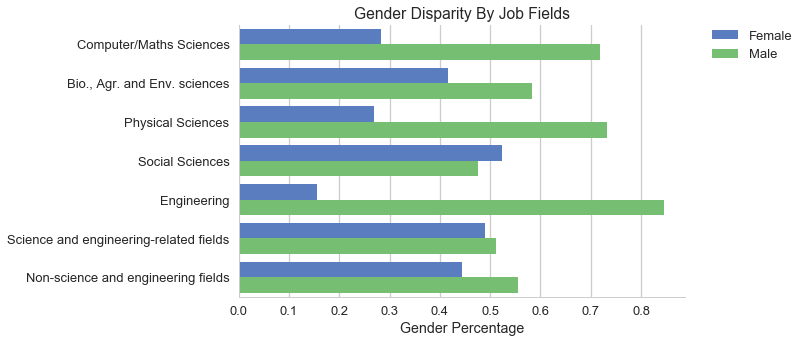

In [38]:
#Compare and plot the employment percentage for male and female college graduates
plt.figure(figsize=[8,5])
sns.barplot(y='JobS', x='value', data=df_job_gender_melt, hue='GENDERS', order=job_order, palette="muted")
plt.title('Gender Disparity By Job Fields')
plt.xlabel('Gender Percentage')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
#look at detailed group for explanation https://highered.ipums.org/highered-action/variables/NOCPR#codes_section 

## What is the pay disparity by genders and fields? ## 
1. The job fields that have the least pay gap between men and women are: engineering, computer/maths sciences and bio/life sciences. 
2. Engineering field gives the best compensation to their female employees compared with other jobs. 
3. On the contrary, the lowest pay check for females goes to non-science and engineering field. The discrepancy in the compensation for male and female groups also goes to the same field. Recall that this group contains job title such as 'Management' and 'Administration'. This could be indicating the even severe gender disparity in management positions. 

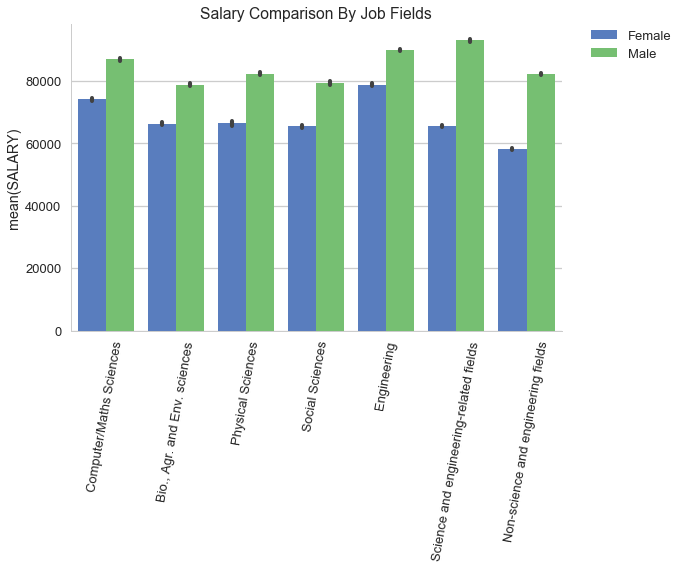

In [39]:
#plot of salary VS type of job 
plt.figure(figsize=(8,8))
sns.barplot(x="JobS", y="SALARY", data=df, hue="GENDERS", order=job_order, palette="muted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Salary Comparison By Job Fields')
plt.xticks(rotation=80)
plt.xlabel('')
sns.despine()
plt.tight_layout()

## Are there differences in job satisfaction between genders? ## 
 

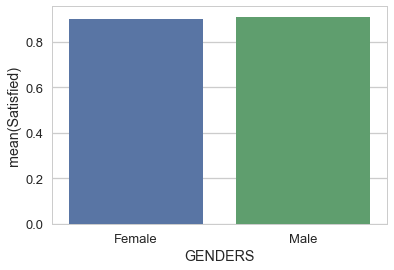

In [40]:
#how many people are satisfied with their jobs
df_graduate_satisfy = df.groupby('GENDERS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()
sns.barplot(x='GENDERS', y='Satisfied', data=df_graduate_satisfy)

#### It does not seem to have much a difference in job satisfaction between men and women, judging from the plot above. ####

Now let us take a detailed look at the women job satisfaction rate for different job fields. 


In [41]:
employ_female_2003_job_stis = df_2003[df_2003['GENDERS']=='Female'].groupby('JobS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()
employ_female_2013_job_stis = df_2013[df_2013['GENDERS']=='Female'].groupby('JobS')['JobSatis'].value_counts(normalize=True).unstack().reset_index()
employ_female_2003_job_stis

JobSatis,JobS,Dissatisfied,Satisfied
0,"Bio., Agr. and Env. sciences",0.091612,0.908388
1,Computer/Maths Sciences,0.111699,0.888301
2,Engineering,0.105935,0.894065
3,Non-science and engineering fields,0.107339,0.892661
4,Physical Sciences,0.085873,0.914127
5,Science and engineering-related fields,0.075319,0.924681
6,Social Sciences,0.087334,0.912666


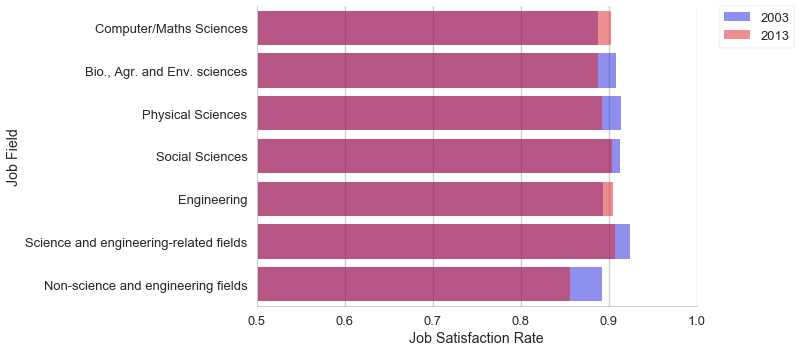

In [42]:
fig, axs = plt.subplots(figsize=(10,5))

#Compare and plot the employment percentage for male and female college graduates
sns.set_color_codes("pastel")
sns.barplot(y="JobS", x="Satisfied", order=job_order, alpha=0.5, data=employ_female_2003_job_stis, color='blue', label='2003')


#Compare and plot the employment percentage for male and female doctor graduates
sns.set_color_codes("muted")
sns.barplot(x="Satisfied", y="JobS", order=job_order, alpha=0.5, data=employ_female_2013_job_stis, color='red', label='2013')
axs.set(xlim=(0.5, 1), ylabel="Job Field",
       xlabel="Job Satisfaction Rate")
sns.despine()
axs.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=True)
plt.tight_layout()